In [ ]:
# Check assigned GPU and VRAM availability
!nvidia-smi

Tue Feb 24 18:17:53 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 580.82.07              Driver Version: 580.82.07      CUDA Version: 13.0     |
+-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA L4                      Off |   00000000:00:03.0 Off |                    0 |
| N/A   44C    P8             13W /   72W |       0MiB /  23034MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
# Clone the repository to the local fast storage
!git clone https://github.com/rlucendo/volumetric-brain-segmentation.git

# Verify that src/data NOW exists
!echo "--- Verifying src/ directory again ---"
!ls -R src/

# Navigate into the repository
%cd volumetric-brain-segmentation

# Install required dependencies
!pip install -r requirements.txt

# Install Weights & Biases explicitly if not in requirements
!pip install wandb -qU

Cloning into 'volumetric-brain-segmentation'...
remote: Enumerating objects: 97, done.
remote: Counting objects: 100% (97/97), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 97 (delta 33), reused 93 (delta 32), pack-reused 0 (from 0)
Receiving objects: 100% (97/97), 1022.71 KiB | 36.52 MiB/s, done.
Resolving deltas: 100% (33/33), done.
--- Verifying src/ directory again ---
ls: cannot access 'src/': No such file or directory
/content/volumetric-brain-segmentation
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 857.3/857.3 kB 61.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 49.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 80.7 MB/s eta 0:00:00


In [ ]:
import wandb

# Authenticate with Weights & Biases
# You can get your API key from: https://wandb.ai/authorize
wandb.login()

/usr/local/lib/python3.12/dist-packages/notebook/notebookapp.py:191: SyntaxWarning: invalid escape sequence '\/'
  | |_| | '_ \/ _` / _` |  _/ -_)
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice:

 2


wandb: You chose 'Use an existing W&B account'
wandb: Logging into https://api.wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: Create a new API key at: https://wandb.ai/authorize?ref=models
wandb: Store your API key securely and do not share it.
wandb: Paste your API key and hit enter:

 ··········


wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: r-lucendo (rlucendo) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

In [ ]:
import wandb
import os
import shutil

# 1. Borramos el archivo corrupto
!rm -f checkpoints/last.ckpt

!mkdir -p /content/volumetric-brain-segmentation/checkpoints

# 2. Nos conectamos a W&B (Colab ya tiene tus credenciales cacheadas)
api = wandb.Api()

# 3. Descarga del artifact del último entrenamiento
artifact_path = "rlucendo/brats-3d-segmentation/model-326li7z2:v19"

print(f"Descargando modelo desde la nube: {artifact_path}...")
artifact = api.artifact(artifact_path, type='model')
artifact_dir = artifact.download()

# 4. W&B lo descarga en una carpeta oculta. Lo movemos a nuestro sitio oficial
# El archivo real dentro del artifact suele llamarse 'model.ckpt'
downloaded_file = os.path.join(artifact_dir, "model.ckpt")
shutil.copy(downloaded_file, "checkpoints/last.ckpt")

# 5. Comprobamos que el archivo sea un binario real y pesado
!ls -lh checkpoints/last.ckpt

/usr/local/lib/python3.12/dist-packages/notebook/notebookapp.py:191: SyntaxWarning:

invalid escape sequence '\/'

wandb: [wandb.Api()] Loaded credentials for https://api.wandb.ai from /root/.netrc.


Descargando modelo desde la nube: rlucendo/brats-3d-segmentation/model-326li7z2:v19...


wandb: Downloading large artifact 'model-326li7z2:v19', 55.24MB. 1 files...
wandb:   1 of 1 files downloaded.  
Done. 00:00:08.2 (6.7MB/s)


-rw-r--r-- 1 root root 56M Feb 23 00:56 checkpoints/last.ckpt


In [ ]:
# ==========================================
# PHASE 1: DATA INGESTION & PREPARATION
# ==========================================

# Executes the standalone ETL (Extract, Transform, Load) pipeline.
# Automatically provisions directories, downloads the BraTS dataset,
# applies medical-grade transformations, and caches the 3D volumes in memory.
# Note: 'PYTHONPATH=.' ensures absolute imports from the 'src' directory work correctly.
!PYTHONPATH=. python scripts/etl.py

<frozen importlib._bootstrap_external>:1301: FutureWarning: The cuda.cudart module is deprecated and will be removed in a future release, please switch to use the cuda.bindings.runtime module instead.
2026-02-24 18:18:33.070197: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-02-24 18:18:33.088179: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1771957113.107601    1417 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1771957113.113838    1417 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register facto

In [ ]:
# ==========================================
# PHASE 2: MODEL TRAINING & EVALUATION
# ==========================================

!PYTHONPATH=. python scripts/train.py

# SCENARIO A: Train a New Model from Scratch
# Initializes a fresh 3D U-Net architecture and triggers the training loop from Epoch 0.

# SCENARIO B: Resume Interrupted Training (Fault Tolerance)
# Recovers model weights, optimizer states, and epoch progress from a saved checkpoint.
# Essential for surviving Google Colab session timeouts or cloud instance preemptions.

# SCENARIO C: Evaluate an Existing Model
# Bypasses the training loop and runs strict validation on a pre-trained model
# to compute clinical metrics (e.g., volumetric Dice score) across the dataset.

Se han truncado las últimas 5000 líneas del flujo de salida.
                                                               val/dice_score:  
                                                               0.697            
                                                               train/loss_epoch:
                                                               0.490            
Epoch 96/99 ━━━━━━━━━━━━━━━━━ 97/97 0:01:39 • 0:00:00 1.30it/s v_num: i7z2      
                                                               train/loss_step: 
                                                               0.519 val/loss:  
                                                               0.263            
                                                               val/dice_score:  
                                                               0.697            
                                                               train/loss_epoch:
                                                

Loading volumes for BRATS_001.nii.gz...
Dataset sample successfully saved to: brats_dataset_sample.png


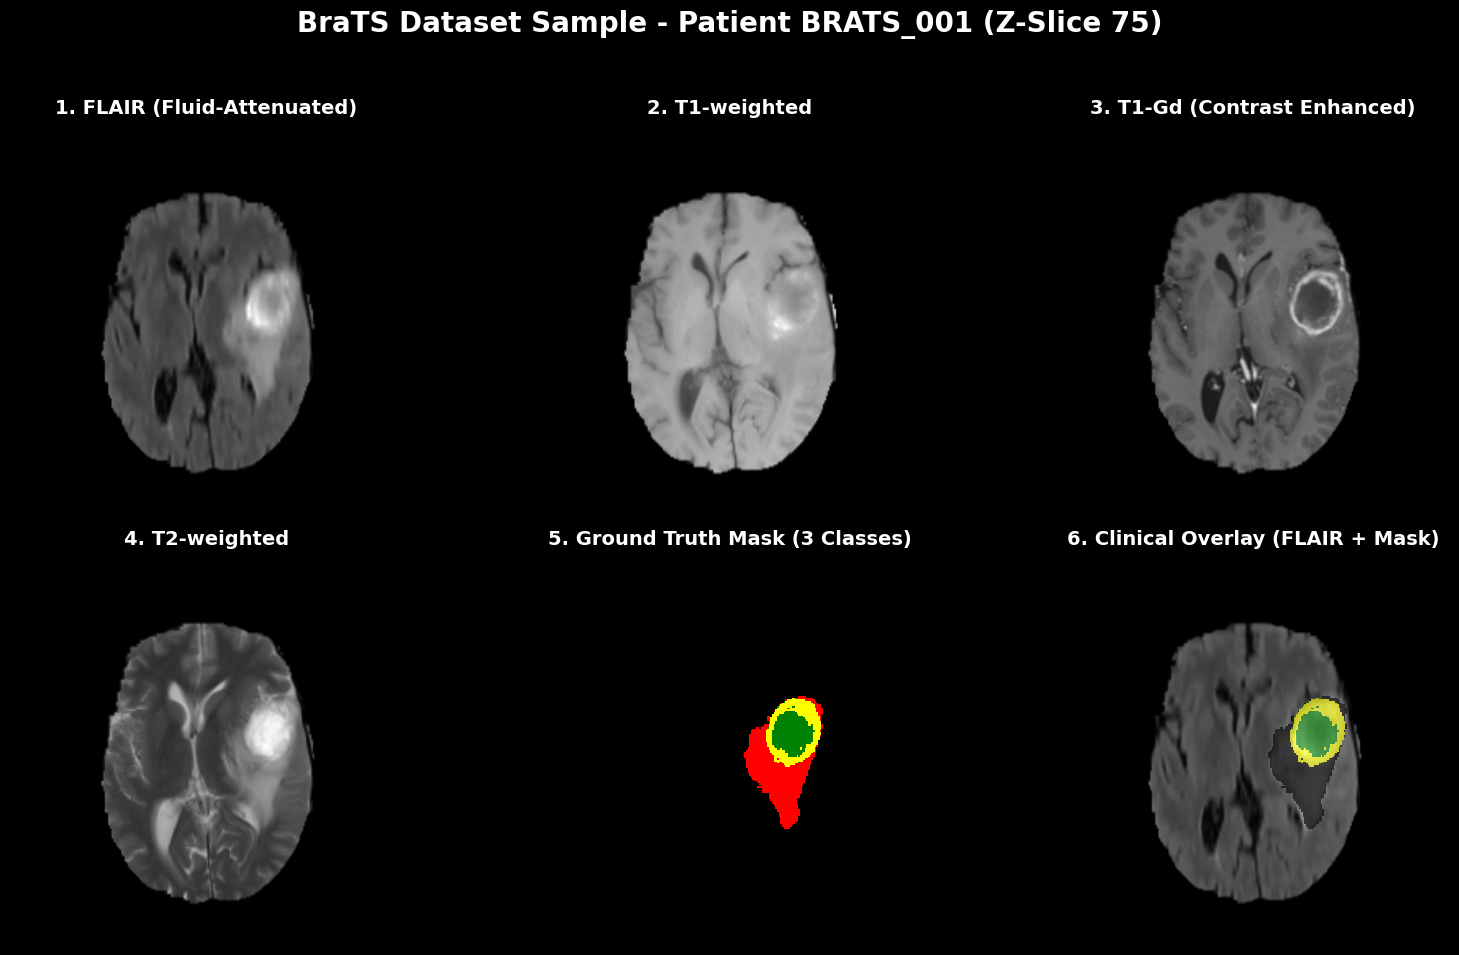

In [ ]:
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# --- CONFIGURATION ---
DATA_DIR = "/content/volumetric-brain-segmentation/data/Task01_BrainTumour/"
OUTPUT_FILENAME = "brats_dataset_sample.png"

# We select a specific patient and slice where the tumor is clearly visible
# to ensure the README image always looks highly illustrative.
PATIENT_ID = "BRATS_001.nii.gz"
Z_SLICE = 75

IMG_PATH = os.path.join(DATA_DIR, "imagesTr", PATIENT_ID)
LBL_PATH = os.path.join(DATA_DIR, "labelsTr", PATIENT_ID)

def generate_dataset_mosaic():
    """
    Generates a 2x3 visualization mosaic showcasing the 4 MRI modalities,
    the ground truth segmentation mask, and a clinical overlay.
    """
    print(f"Loading volumes for {PATIENT_ID}...")
    if not os.path.exists(IMG_PATH) or not os.path.exists(LBL_PATH):
        raise FileNotFoundError(f"Missing data at {IMG_PATH} or {LBL_PATH}")

    # Load NIfTI volumes
    img_vol = nib.load(IMG_PATH).get_fdata()
    lbl_vol = nib.load(LBL_PATH).get_fdata()

    # Extract the specific 2D slice and rotate 90 degrees (neurological convention)
    # img_vol shape: (H, W, D, Channels)
    slice_flair = np.rot90(img_vol[:, :, Z_SLICE, 0])
    slice_t1w   = np.rot90(img_vol[:, :, Z_SLICE, 1])
    slice_t1gd  = np.rot90(img_vol[:, :, Z_SLICE, 2])
    slice_t2w   = np.rot90(img_vol[:, :, Z_SLICE, 3])
    slice_lbl   = np.rot90(lbl_vol[:, :, Z_SLICE])

    # Setup the plot (2 rows, 3 columns) with a dark theme for medical imaging
    plt.style.use('dark_background')
    fig, axes = plt.subplots(2, 3, figsize=(16, 10))
    fig.suptitle(f'BraTS Dataset Sample - Patient {PATIENT_ID.split(".")[0]} (Z-Slice {Z_SLICE})',
                 fontsize=20, weight='bold', color='white', y=0.98)

    axes = axes.flatten()

    # 1. Plot MRI Modalities
    modalities = [
        (slice_flair, "1. FLAIR (Fluid-Attenuated)"),
        (slice_t1w, "2. T1-weighted"),
        (slice_t1gd, "3. T1-Gd (Contrast Enhanced)"),
        (slice_t2w, "4. T2-weighted")
    ]

    for i, (data, title) in enumerate(modalities):
        axes[i].imshow(data, cmap='gray', interpolation='bilinear')
        axes[i].set_title(title, fontsize=14, weight='bold')
        axes[i].axis('off')

    # 2. Plot Ground Truth Mask
    # BraTS Classes: 1 (Red)=Necrotic, 2 (Green)=Edema, 3 (Yellow)=Enhancing
    custom_cmap = ListedColormap(['black', 'red', 'green', 'yellow'])

    axes[4].imshow(slice_lbl, cmap=custom_cmap, interpolation='nearest')
    axes[4].set_title("5. Ground Truth Mask (3 Classes)", fontsize=14, weight='bold')
    axes[4].axis('off')

    # 3. Plot Clinical Overlay
    axes[5].imshow(slice_flair, cmap='gray', interpolation='bilinear')
    masked_lbl = np.ma.masked_where(slice_lbl == 0, slice_lbl)
    axes[5].imshow(masked_lbl, cmap=custom_cmap, alpha=0.6, interpolation='nearest')
    axes[5].set_title("6. Clinical Overlay (FLAIR + Mask)", fontsize=14, weight='bold')
    axes[5].axis('off')

    # Add cosmetic borders
    for ax in axes:
        for spine in ax.spines.values():
            spine.set_edgecolor('#444444')
            spine.set_linewidth(2)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig(OUTPUT_FILENAME, dpi=300, bbox_inches='tight', facecolor='black')
    print(f"Dataset sample successfully saved to: {OUTPUT_FILENAME}")
    plt.show()

if __name__ == "__main__":
    generate_dataset_mosaic()

In [ ]:
!env PYTHONPATH=. python scripts/infer.py \
    --config_dir configs \
    --ckpt_path checkpoints/last.ckpt \
    --input_image data/Task01_BrainTumour/imagesTr/BRATS_001.nii.gz \
    --output_dir predictions/

<frozen importlib._bootstrap_external>:1301: FutureWarning: The cuda.cudart module is deprecated and will be removed in a future release, please switch to use the cuda.bindings.runtime module instead.
2026-02-22 17:49:40.610439: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-02-22 17:49:40.629483: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1771782580.652316    8700 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1771782580.660040    8700 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register facto

In [ ]:
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Configure matplotlib for professional medical plotting (dark backgrounds often preferred)
plt.style.use('dark_background')
plt.rcParams['figure.dpi'] = 150

In [ ]:
# Define relative paths assuming the notebook is executed from the repository root
# Adjust the patient ID if necessary (e.g., BRATS_001)
data_dir = "/content/volumetric-brain-segmentation/data/Task01_BrainTumour"
image_path = os.path.join(data_dir, "imagesTr", "BRATS_001.nii.gz")
label_path = os.path.join(data_dir, "labelsTr", "BRATS_001.nii.gz")

# Load NIfTI files using nibabel to preserve original medical metadata
img_nifti = nib.load(image_path)
lbl_nifti = nib.load(label_path)

# Extract physical voxel spacing (resolution in mm)
voxel_spacing = img_nifti.header.get_zooms()

# Extract the raw NumPy arrays
img_data = img_nifti.get_fdata()
lbl_data = lbl_nifti.get_fdata()

print(f"--- NIfTI Volume Metadata ---")
print(f"Original Image Shape: {img_data.shape} -> (H, W, D, Channels)")
print(f"Original Label Shape: {lbl_data.shape} -> (H, W, D)")
print(f"Voxel Spacing (mm):   {voxel_spacing[:3]} (X, Y, Z)")

--- NIfTI Volume Metadata ---
Original Image Shape: (240, 240, 155, 4) -> (H, W, D, Channels)
Original Label Shape: (240, 240, 155) -> (H, W, D)
Voxel Spacing (mm):   (np.float32(1.0), np.float32(1.0), np.float32(1.0)) (X, Y, Z)


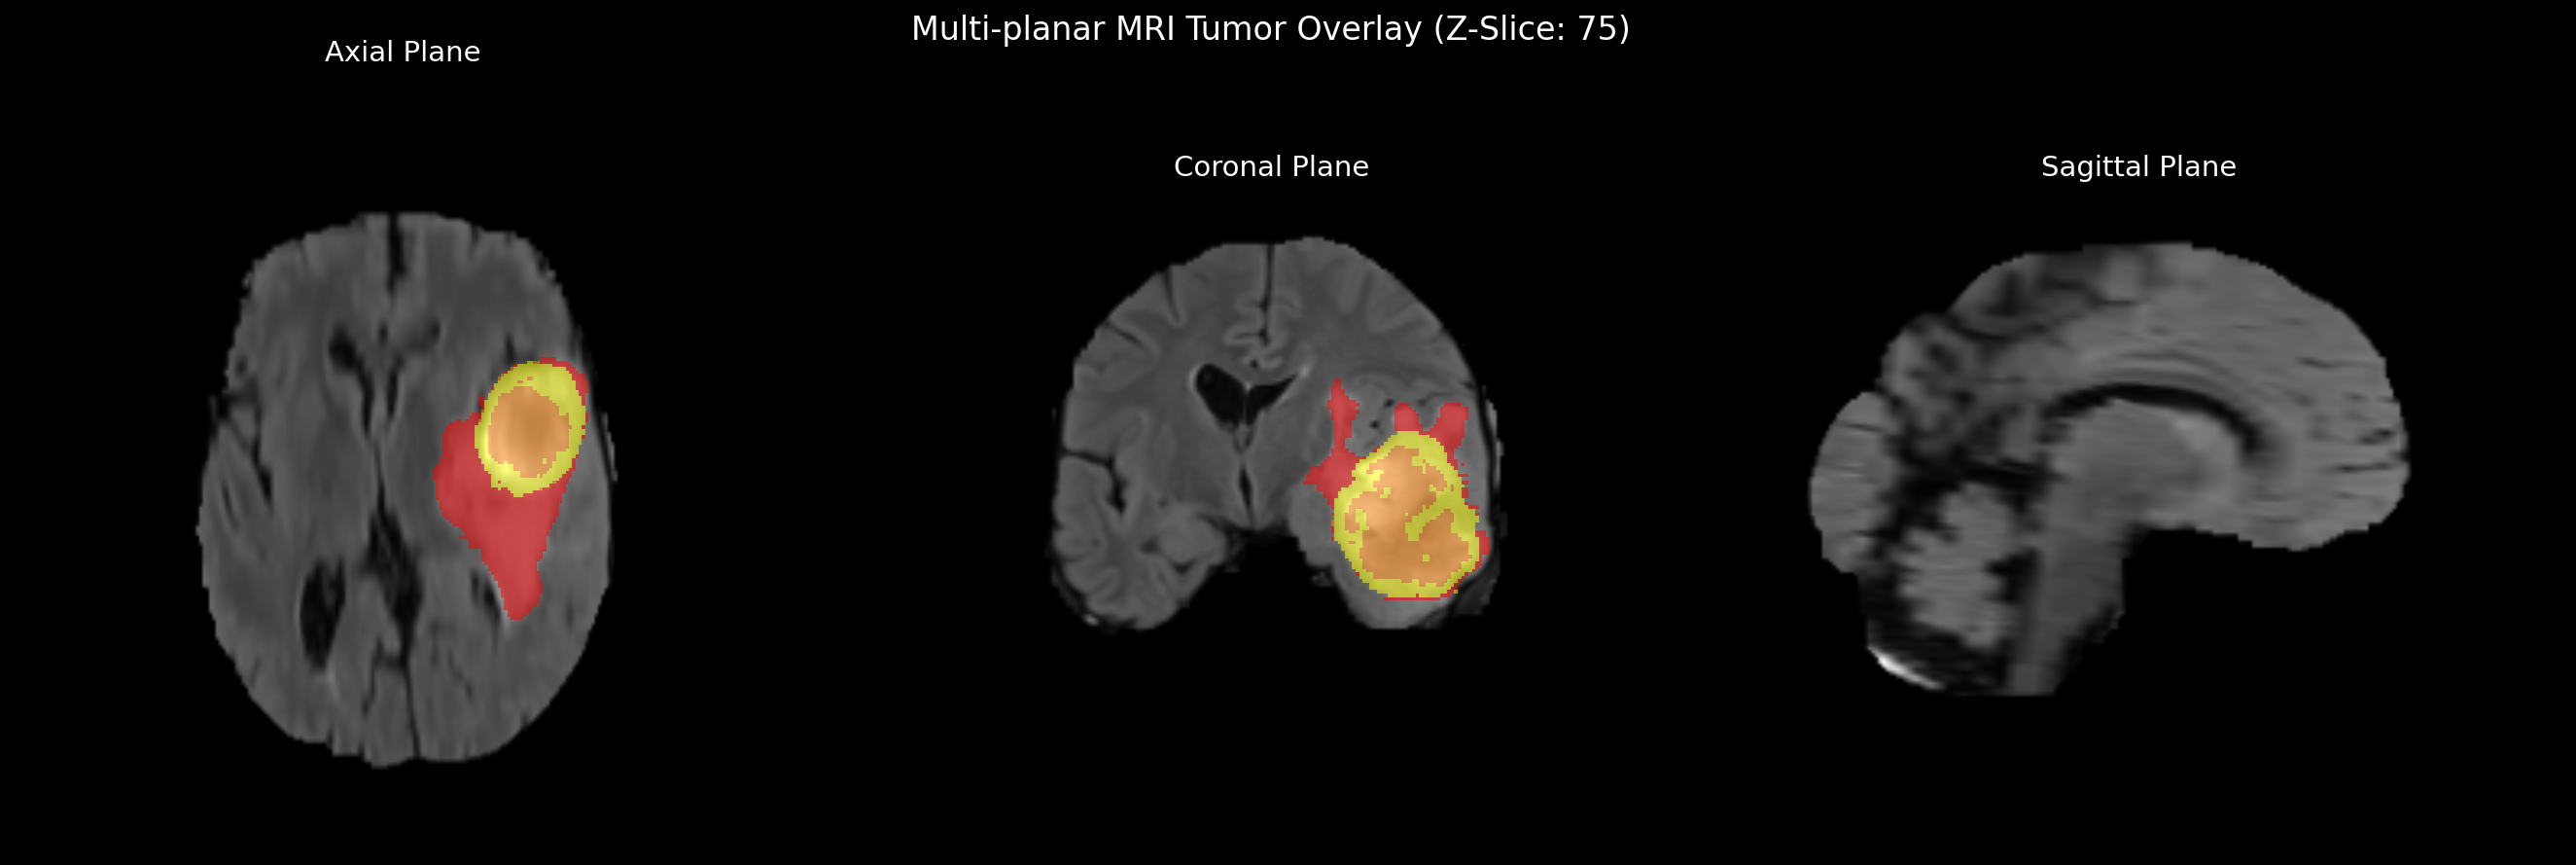

In [ ]:
def plot_radiological_views(image_vol: np.ndarray, label_vol: np.ndarray, slice_z: int, channel: int = 0):
    """
    Renders the three standard radiological planes (Axial, Coronal, Sagittal)
    with a transparent segmentation mask overlay.

    Args:
        image_vol: 4D numpy array (H, W, D, C) from BraTS.
        label_vol: 3D numpy array (H, W, D) containing class indices.
        slice_z: Depth index to visualize the axial plane.
        channel: MRI modality index (0=FLAIR, 1=T1w, 2=t1gd, 3=T2w).
    """
    # Isolate the specific MRI sequence (e.g., FLAIR)
    img_3d = image_vol[..., channel]

    # Calculate middle slices for coronal and sagittal planes dynamically
    mid_x = img_3d.shape[0] // 2
    mid_y = img_3d.shape[1] // 2

    # Extract 2D slices for all three planes
    slices_img = [
        img_3d[:, :, slice_z],  # Axial (XY plane)
        img_3d[:, mid_y, :],    # Coronal (XZ plane)
        img_3d[mid_x, :, :]     # Sagittal (YZ plane)
    ]

    slices_lbl = [
        label_vol[:, :, slice_z],
        label_vol[:, mid_y, :],
        label_vol[mid_x, :, :]
    ]

    titles = ["Axial Plane", "Coronal Plane", "Sagittal Plane"]

    # Set up the matplotlib figure
    fig, axes = plt.subplots(1, 3, figsize=(18, 6), facecolor='black')
    fig.suptitle(f"Multi-planar MRI Tumor Overlay (Z-Slice: {slice_z})", color='white', fontsize=16)

    for ax, img_slice, lbl_slice, title in zip(axes, slices_img, slices_lbl, titles):
        # Rotate 90 degrees to match standard neurological viewing orientation
        img_slice = np.rot90(img_slice)
        lbl_slice = np.rot90(lbl_slice)

        # Plot the base MRI scan (Grayscale)
        ax.imshow(img_slice, cmap="gray", interpolation="bilinear")

        # Mask the background (class 0) so it becomes fully transparent
        masked_lbl = np.ma.masked_where(lbl_slice == 0, lbl_slice)

        # Overlay the tumor mask using a distinct colormap
        # We use alpha=0.5 to allow the underlying brain tissue to remain visible
        ax.imshow(masked_lbl, cmap="autumn", alpha=0.5, interpolation="none")

        ax.set_title(title, color='white', fontsize=14)
        ax.axis("off")

    plt.tight_layout()
    plt.show()

# Execute the visualization
# Note: Slice 75 is usually a good cross-section where the tumor is highly visible in BraTS_001
plot_radiological_views(img_data, lbl_data, slice_z=75, channel=0)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_segmentation_error_map(image_slice: np.ndarray, true_mask: np.ndarray, pred_mask: np.ndarray):
    """
    Generates a clinical error map comparing ground truth vs prediction.
    Green = True Positive (Correct)
    Red = False Positive (Over-segmentation)
    Blue = False Negative (Missed tumor)
    """
    # 1. Binarize masks for a single class
    y_true = (true_mask > 0).astype(int)
    y_pred = (pred_mask > 0).astype(int)

    # 2. Compute error matrices
    true_positive = np.logical_and(y_true == 1, y_pred == 1)
    false_positive = np.logical_and(y_true == 0, y_pred == 1)
    false_negative = np.logical_and(y_true == 1, y_pred == 0)

    # 3. Create an empty RGB overlay image (RGBA)
    overlay = np.zeros((*y_true.shape, 4), dtype=np.float32)

    # Assign colors with 50% transparency (Alpha = 0.5)
    overlay[true_positive]  = [0.0, 1.0, 0.0, 0.5]  # Green
    overlay[false_positive] = [1.0, 0.0, 0.0, 0.5]  # Red
    overlay[false_negative] = [0.0, 0.0, 1.0, 0.5]  # Blue

    # 4. Plotting
    plt.figure(figsize=(10, 10), facecolor='black')
    plt.title("Clinical Error Map (Z-Slice)", color="white", fontsize=16)

    # Plot base MRI
    plt.imshow(np.rot90(image_slice), cmap="gray", interpolation="bilinear")

    # Plot the colored error map on top
    plt.imshow(np.rot90(overlay), interpolation="none")

    # Create custom legend
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='green', edgecolor='green', label='True Positive (Hit)', alpha=0.5),
        Patch(facecolor='red', edgecolor='red', label='False Positive (Over-segmentation)', alpha=0.5),
        Patch(facecolor='blue', edgecolor='blue', label='False Negative (Missed)', alpha=0.5)
    ]
    plt.legend(handles=legend_elements, loc='upper right', frameon=True, facecolor='black', labelcolor='white')

    plt.axis('off')
    plt.tight_layout()
    plt.show()

--- Verificación de Dimensiones ---
Image shape: (240, 240, 155, 4) (H, W, D, C)
Label shape: (240, 240, 155) (H, W, D)
Pred shape:  (240, 240, 155) (H, W, D)


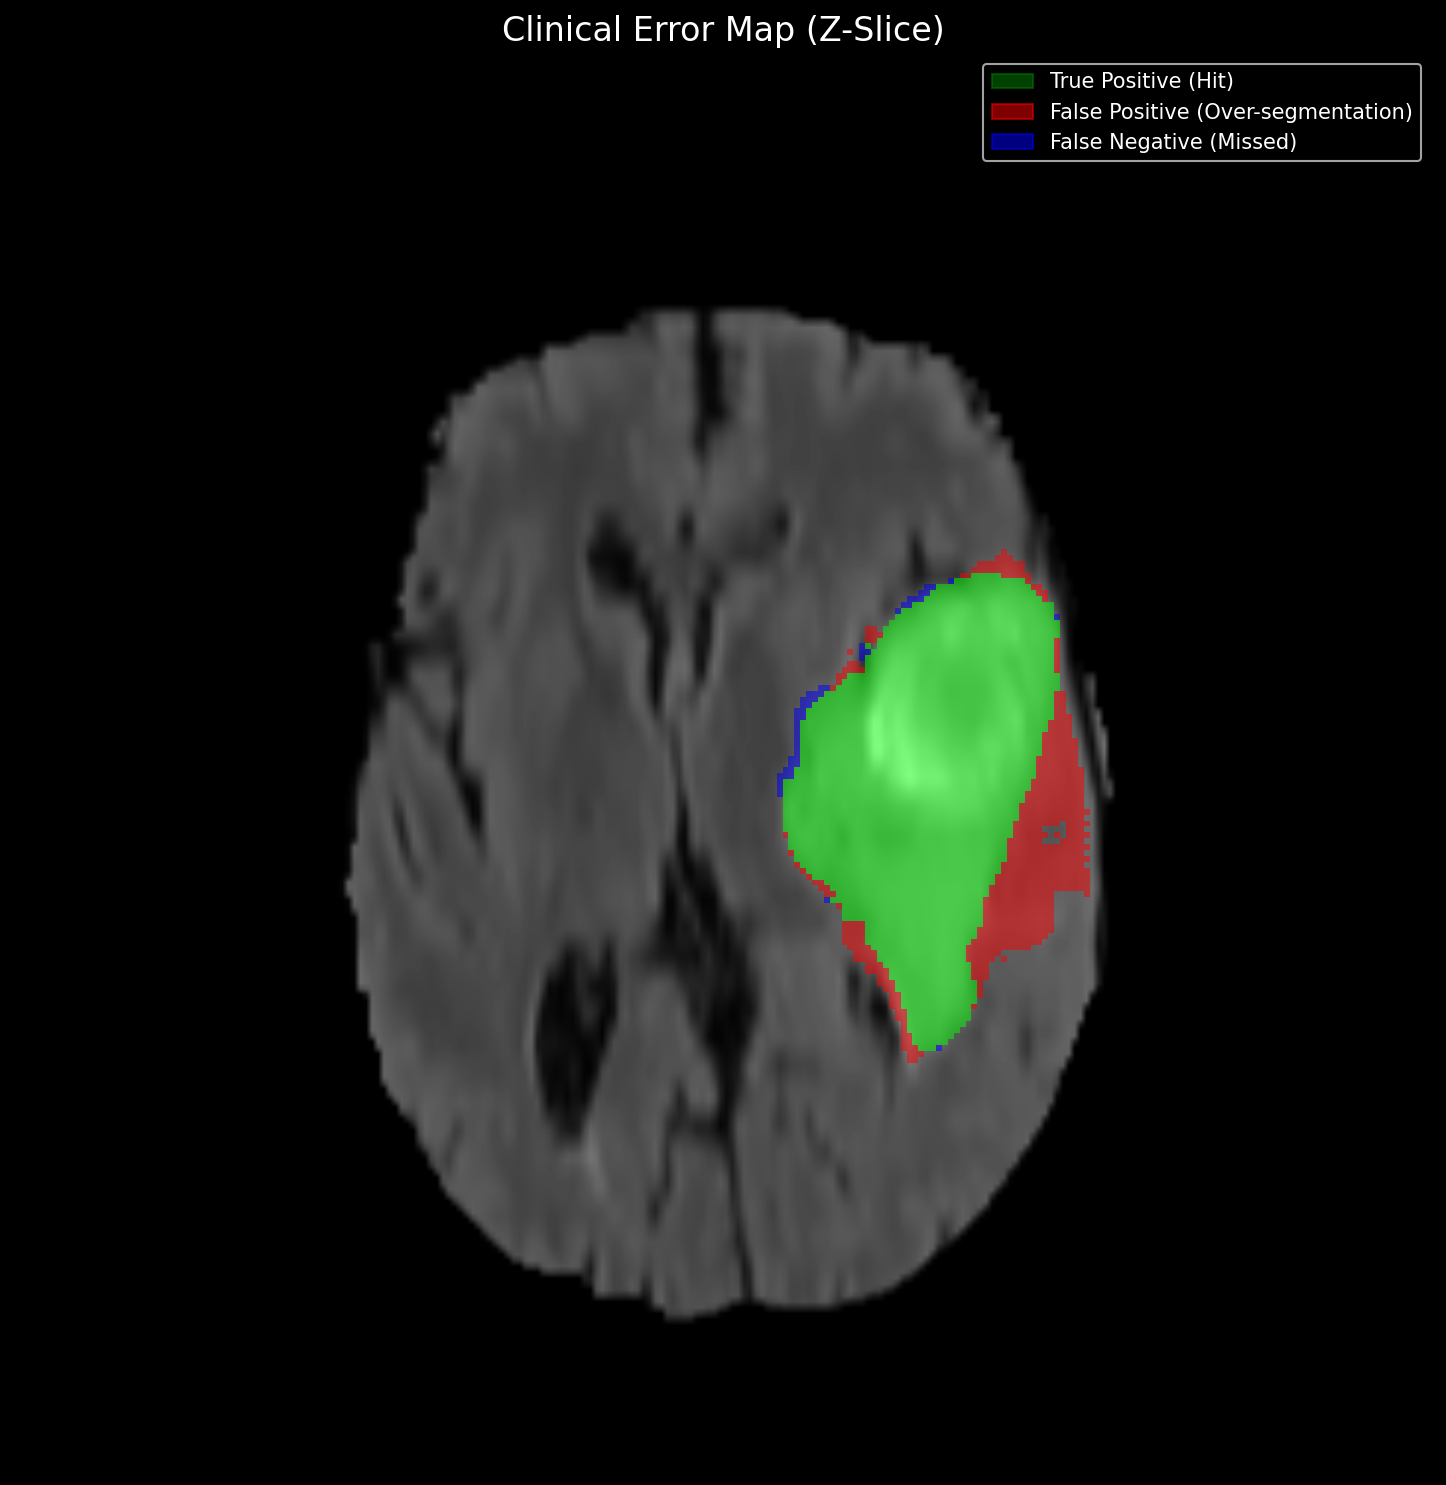

In [ ]:
import os
import nibabel as nib

# 1. Cargar el archivo de predicción que generaste en el Sprint 4
# Asegúrate de que la ruta coincida con el nombre de tu archivo generado
pred_path = "/content/volumetric-brain-segmentation/predictions/BRATS_001/BRATS_001_pred.nii.gz"

if os.path.exists(pred_path):
    pred_nifti = nib.load(pred_path)
    # Al exportar desde MONAI, a veces añade una dimensión extra vacía. Usamos squeeze() para asegurar (H, W, D)
    prediction_data = np.squeeze(pred_nifti.get_fdata())

    print("--- Verificación de Dimensiones ---")
    print(f"Image shape: {img_data.shape} (H, W, D, C)")
    print(f"Label shape: {lbl_data.shape} (H, W, D)")
    print(f"Pred shape:  {prediction_data.shape} (H, W, D)")

    # 2. Llamada a la función con el indexado correcto
    # img_data[:, :, 75, 0] -> Todas las X, Todas las Y, Corte Z=75, Canal=0 (FLAIR)
    # lbl_data[:, :, 75] -> Todas las X, Todas las Y, Corte Z=75

    plot_segmentation_error_map(
        image_slice=img_data[:, :, 75, 0],
        true_mask=lbl_data[:, :, 75],
        pred_mask=prediction_data[:, :, 75]
    )
else:
    print(f"Error: No se ha encontrado el archivo {pred_path}. ¿Ejecutaste el script infer.py?")

In [ ]:
import torch
import numpy as np
from monai.metrics import compute_dice, compute_hausdorff_distance

def calculate_clinical_metrics(true_vol: np.ndarray, pred_vol: np.ndarray, voxel_spacing: tuple):
    """
    Calculates Dice Score and 95th Percentile Hausdorff Distance (HD95)
    for the Whole Tumor (WT) region.
    """
    y_true = torch.tensor((true_vol > 0).astype(np.float32)).unsqueeze(0).unsqueeze(0)
    y_pred = torch.tensor((pred_vol > 0).astype(np.float32)).unsqueeze(0).unsqueeze(0)

    # 2. Compute Dice Score
    dice = compute_dice(y_pred=y_pred, y=y_true)
    dice_val = dice.item()

    # 3. Compute HD95
    # Convertimos los numpy.float32 a floats nativos de Python para satisfacer a MONAI
    spacing_floats = [float(s) for s in voxel_spacing[:3]]

    hd95 = compute_hausdorff_distance(
        y_pred=y_pred,
        y=y_true,
        percentile=95,
        spacing=spacing_floats # <--- Aquí usamos la lista convertida
    )
    hd95_val = hd95.item()

    print(f"--- Quantitative Clinical Metrics (Whole Tumor) ---")
    print(f"Dice Score: {dice_val:.4f} (Closer to 1.0 is better)")
    print(f"HD95:       {hd95_val:.4f} mm (Closer to 0.0 is better)")

# Assuming voxel_spacing was calculated in the EDA cell: voxel_spacing = img_nifti.header.get_zooms()
calculate_clinical_metrics(lbl_data, prediction_data, voxel_spacing)

<frozen importlib._bootstrap_external>:1301: FutureWarning: The cuda.cudart module is deprecated and will be removed in a future release, please switch to use the cuda.bindings.runtime module instead.
/usr/local/lib/python3.12/dist-packages/monai/utils/deprecate_utils.py:221: FutureWarning: monai.metrics.utils get_mask_edges:always_return_as_numpy: Argument `always_return_as_numpy` has been deprecated since version 1.5.0. It will be removed in version 1.7.0. The option is removed and the return type will always be equal to the input type.
  warn_deprecated(argname, msg, warning_category)


--- Quantitative Clinical Metrics (Whole Tumor) ---
Dice Score: 0.8508 (Closer to 1.0 is better)
HD95:       5.4772 mm (Closer to 0.0 is better)


Loading model for live uncertainty analysis...
Executing sliding window inference...


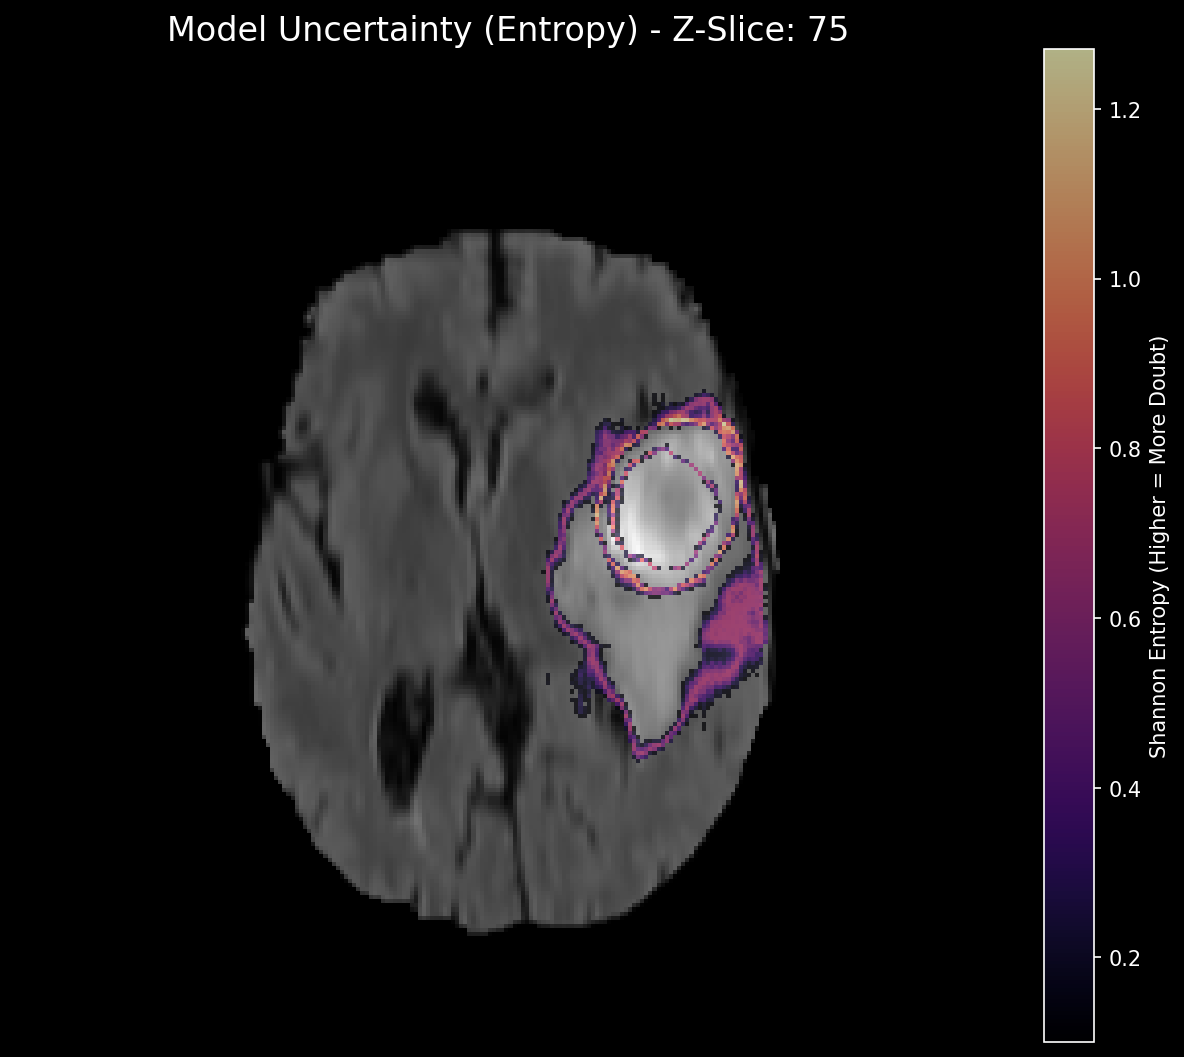

In [ ]:
import torch
import torch.serialization # El hogar real de la función original
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from monai.inferers import sliding_window_inference

# --- PyTorch 2.6+ Security Bypass (Bulletproof Monkeypatch) ---
# 1. Forzamos la restauración de la función original de fábrica para matar cualquier bucle infinito previo
torch.load = torch.serialization.load

# 2. Guardamos la función limpia y creamos nuestro wrapper de confianza
_true_original_load = torch.load
def _trusted_load(*args, **kwargs):
    kwargs["weights_only"] = False
    return _true_original_load(*args, **kwargs)

# 3. Aplicamos el parche de forma segura
torch.load = _trusted_load
# ---------------------------------------------------

from src.models.seg_module import BraTSSegmentationModule

def plot_uncertainty_map(image_vol: np.ndarray, ckpt_path: str, slice_z: int):
    """
    Runs live inference to extract raw Softmax probabilities and calculates
    Shannon Entropy to visualize the model's spatial uncertainty (XAI).
    """
    print("Loading model for live uncertainty analysis...")

    # 1. Load the model from the checkpoint
    model = BraTSSegmentationModule.load_from_checkpoint(ckpt_path, strict=False)

    # Move to GPU if available and set to evaluation mode
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    model.eval()

    # 2. Prepare the input tensor
    # img_data is (H, W, D, C). We need (B, C, H, W, D) for PyTorch
    input_tensor = torch.tensor(image_vol, dtype=torch.float32)
    input_tensor = input_tensor.permute(3, 0, 1, 2).unsqueeze(0) # Shape: (1, 4, H, W, D)

    # Standardize input (Z-score normalization per channel)
    for c in range(input_tensor.shape[1]):
        channel_data = input_tensor[0, c, ...]
        mask = channel_data > 0
        if mask.any():
            mean, std = channel_data[mask].mean(), channel_data[mask].std()
            input_tensor[0, c, mask] = (channel_data[mask] - mean) / (std + 1e-8)

    input_tensor = input_tensor.to(device)

    # 3. Execute sliding window inference to get raw logits
    print("Executing sliding window inference...")
    with torch.no_grad():
        logits = sliding_window_inference(
            inputs=input_tensor,
            roi_size=(96, 96, 96),
            sw_batch_size=4,
            predictor=model.forward
        )

        # 4. Convert logits to probabilities (Softmax)
        probs = F.softmax(logits, dim=1) # Shape: (1, 4, H, W, D)

    # 5. Calculate Shannon Entropy along the channel dimension
    # H = -sum(P * log(P))
    epsilon = 1e-8 # Prevent log(0)
    entropy = -torch.sum(probs * torch.log(probs + epsilon), dim=1) # Shape: (1, H, W, D)

    # Extract the requested 2D slice and move to CPU for plotting
    entropy_slice = entropy[0, :, :, slice_z].cpu().numpy()
    img_slice = image_vol[:, :, slice_z, 0] # FLAIR channel for background

    # 6. Plot the Uncertainty Map
    plt.figure(figsize=(8, 8), facecolor='black')
    plt.title(f"Model Uncertainty (Entropy) - Z-Slice: {slice_z}", color="white", fontsize=16)

    # Base MRI
    plt.imshow(np.rot90(img_slice), cmap="gray")

    # Entropy Heatmap
    masked_entropy = np.ma.masked_where(entropy_slice < 0.1, entropy_slice)
    plt.imshow(np.rot90(masked_entropy), cmap="magma", alpha=0.7)

    # Add a colorbar
    cbar = plt.colorbar(fraction=0.046, pad=0.04)
    cbar.ax.yaxis.set_tick_params(color='white')
    plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='white')
    cbar.set_label('Shannon Entropy (Higher = More Doubt)', color='white')

    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Execute the XAI function
plot_uncertainty_map(img_data, ckpt_path="checkpoints/last.ckpt", slice_z=75)

In [ ]:
import plotly.graph_objects as go
from skimage.measure import marching_cubes
import numpy as np

def plot_interactive_3d_tumor(pred_vol: np.ndarray):
    """
    Generates an interactive 3D mesh of the predicted tumor using Plotly.
    Allows rotating and zooming inside the Jupyter Notebook.
    """
    print("Extracting 3D mesh using Marching Cubes (this might take a few seconds)...")

    # 1. Isolate the tumor (Ignore background 0)
    # We downsample by step_size to prevent the browser from crashing with too many polygons
    tumor_mask = (pred_vol > 0).astype(float)

    # 2. Extract surface mesh using Marching Cubes
    # spacing adjusts the aspect ratio to real-world dimensions
    verts, faces, normals, values = marching_cubes(tumor_mask, level=0.5, step_size=2)

    # 3. Create the 3D Plotly Figure
    fig = go.Figure(data=[go.Mesh3d(
        x=verts[:, 0],
        y=verts[:, 1],
        z=verts[:, 2],
        i=faces[:, 0],
        j=faces[:, 1],
        k=faces[:, 2],
        color='red', # Standard striking color for the tumor
        opacity=0.8,
        name='Predicted Tumor'
    )])

    # 4. Make it pretty
    fig.update_layout(
        title="Interactive 3D Tumor Reconstruction",
        scene=dict(
            xaxis=dict(title='Sagittal (X)', backgroundcolor="black", gridcolor="gray"),
            yaxis=dict(title='Coronal (Y)', backgroundcolor="black", gridcolor="gray"),
            zaxis=dict(title='Axial (Z)', backgroundcolor="black", gridcolor="gray"),
            bgcolor="black"
        ),
        paper_bgcolor="black",
        font=dict(color="white"),
        margin=dict(l=0, r=0, b=0, t=40)
    )

    fig.show()

# Ejecutamos la función usando tu predicción actual
plot_interactive_3d_tumor(prediction_data)

Extracting 3D mesh using Marching Cubes (this might take a few seconds)...


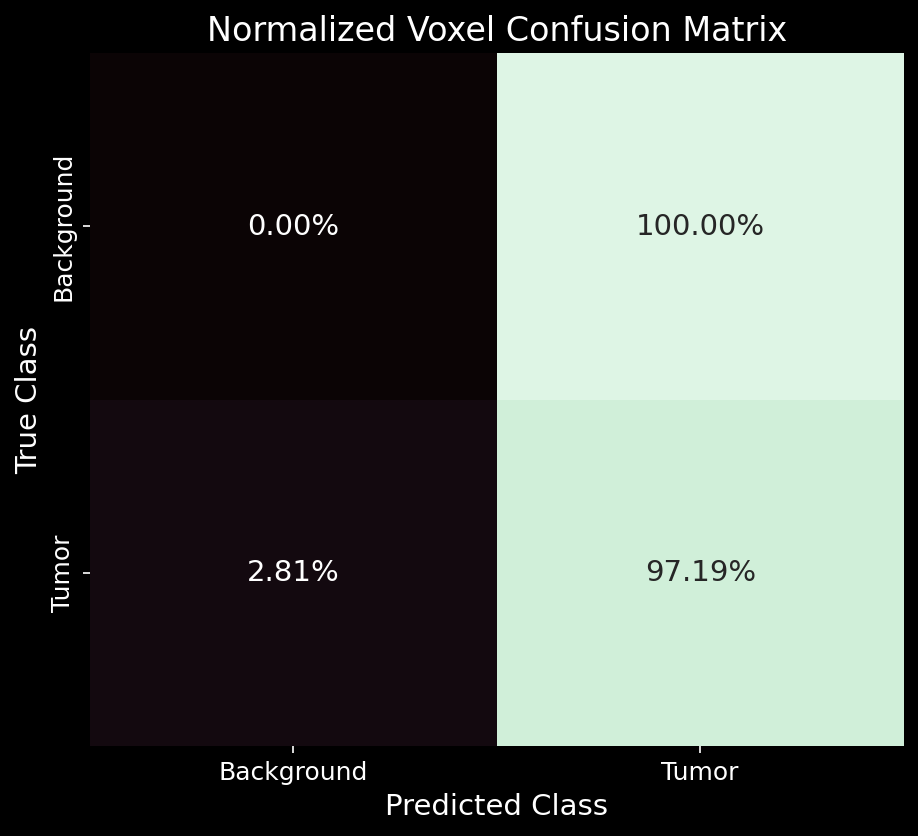

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def plot_voxel_confusion_matrix(true_vol: np.ndarray, pred_vol: np.ndarray):
    """
    Generates a normalized Confusion Matrix at the Voxel level.
    """
    # 1. Flatten the 3D volumes into 1D arrays
    y_true_flat = true_vol.flatten()
    y_pred_flat = pred_vol.flatten()

    # 2. To avoid the massive background class (0) dominating the chart,
    # we filter out voxels where BOTH true and pred are background.
    # We only care about areas where there is actual brain or tumor involved.
    mask = (y_true_flat > 0) | (y_pred_flat > 0)
    y_true_filtered = (y_true_flat[mask] > 0).astype(int)
    y_pred_filtered = (y_pred_flat[mask] > 0).astype(int)

    # 3. Compute Confusion Matrix
    cm = confusion_matrix(y_true_filtered, y_pred_filtered)

    # Normalize by row (true labels) to show percentages
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # 4. Plot with Seaborn
    plt.figure(figsize=(7, 6), facecolor='black')
    ax = plt.axes()
    ax.set_facecolor('black')

    # Use a striking colormap (e.g., 'crest' or 'flare')
    sns.heatmap(cm_normalized, annot=True, fmt=".2%", cmap="mako",
                xticklabels=['Background', 'Tumor'],
                yticklabels=['Background', 'Tumor'],
                annot_kws={"size": 14}, cbar=False, ax=ax)

    plt.title("Normalized Voxel Confusion Matrix", color='white', fontsize=16)
    plt.ylabel('True Class', color='white', fontsize=14)
    plt.xlabel('Predicted Class', color='white', fontsize=14)

    # Styling ticks
    ax.tick_params(colors='white', labelsize=12)
    plt.show()

plot_voxel_confusion_matrix(lbl_data, prediction_data)

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
import os
import glob
import torch
import numpy as np
import nibabel as nib
import ipywidgets as widgets
from IPython.display import display
import plotly.graph_objects as go
from skimage.measure import marching_cubes
from monai.inferers import sliding_window_inference
import warnings

# --- ENVIRONMENT CONFIGURATION ---
warnings.filterwarnings("ignore", category=UserWarning)

# PyTorch 2.6+ checkpoint security bypass for local trusted weights
if not hasattr(torch, "_is_patched_for_ui"):
    torch._original_load = torch.load
    def _trusted_load(*args, **kwargs):
        kwargs["weights_only"] = False
        return torch._original_load(*args, **kwargs)
    torch.load = _trusted_load
    torch._is_patched_for_ui = True

from src.models.seg_module import BraTSSegmentationModule

# --- PATH CONFIGURATION ---
MODEL_PATH = "checkpoints/last.ckpt"
DATA_DIR = "data/Task01_BrainTumour/imagesTr/"

# Retrieve available patient NIfTI files
patient_files = sorted(glob.glob(os.path.join(DATA_DIR, "*.nii.gz")))
patient_names = [os.path.basename(f) for f in patient_files]

# --- INFERENCE ENGINE INITIALIZATION ---
out_logs = widgets.Output()

with out_logs:
    print("Initializing Inference Engine...")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
try:
    model = BraTSSegmentationModule.load_from_checkpoint(MODEL_PATH, strict=False)
    model.to(device)
    model.eval()
    with out_logs:
        print("Model loaded successfully. Ready for inference.")
except Exception as e:
    with out_logs:
        print(f"Failed to load model checkpoint: {e}")

# --- 3D RENDERER INITIALIZATION ---
# Create a strict Layout dictionary to force dimensions and colors from birth
custom_layout = go.Layout(
    template="plotly_dark",
    scene=dict(bgcolor="black", xaxis_visible=True, yaxis_visible=True, zaxis_visible=True),
    paper_bgcolor="black",
    plot_bgcolor="black",
    font=dict(color="white"),
    margin=dict(l=0, r=0, b=0, t=40),
    height=600
)

# Instantiate the widget injecting the layout directly
fig_widget = go.FigureWidget(layout=custom_layout)

# --- PROCESSING FUNCTIONS ---
def extract_mesh(volume: np.ndarray, step_size: int = 2):
    """Extracts 3D mesh geometry from a binary mask using Marching Cubes."""
    mask = (volume > 0).astype(float)
    if not np.any(mask):
        return None, None
    verts, faces, _, _ = marching_cubes(mask, level=0.5, step_size=step_size)
    return verts, faces

def run_prediction_and_render(patient_filename):
    """Executes volumetric inference and updates the 3D Plotly widget."""
    file_path = os.path.join(DATA_DIR, patient_filename)

    # 1. Load raw NIfTI data
    nifti_img = nib.load(file_path)
    image_vol = nifti_img.get_fdata()
    brain_vol = image_vol[..., 0]  # Isolate FLAIR channel for anatomical context

    # 2. Preprocess tensor (H, W, D, C) -> (B, C, H, W, D)
    input_tensor = torch.tensor(image_vol, dtype=torch.float32)
    input_tensor = input_tensor.permute(3, 0, 1, 2).unsqueeze(0)

    # Apply channel-wise Z-score normalization (ignoring background)
    for c in range(input_tensor.shape[1]):
        channel_data = input_tensor[0, c, ...]
        mask = channel_data > 0
        if mask.any():
            mean, std = channel_data[mask].mean(), channel_data[mask].std()
            input_tensor[0, c, mask] = (channel_data[mask] - mean) / (std + 1e-8)

    input_tensor = input_tensor.to(device)

    with out_logs:
        print(f"[{patient_filename}] Processing volumetric data (approx. 8M voxels)...")

    # 3. Execute inference via sliding window
    with torch.no_grad():
        logits = sliding_window_inference(
            inputs=input_tensor,
            roi_size=(96, 96, 96),
            sw_batch_size=4,
            predictor=model.forward
        )
        pred_vol = torch.argmax(logits, dim=1)[0].cpu().numpy()

    with out_logs:
        print("Extracting 3D topological meshes...")

    # 4. Extract meshes
    verts_t, faces_t = extract_mesh(pred_vol, step_size=2) # Tumor mesh (High res)
    verts_b, faces_b = extract_mesh(brain_vol, step_size=4) # Brain mesh (Low res for performance)

    # 5. Batch update the UI widget to prevent flickering
    with fig_widget.batch_update():
        fig_widget.data = [] # Clear previous traces

        if verts_t is not None:
            fig_widget.add_trace(go.Mesh3d(
                x=verts_t[:, 0], y=verts_t[:, 1], z=verts_t[:, 2],
                i=faces_t[:, 0], j=faces_t[:, 1], k=faces_t[:, 2],
                color='red', opacity=1.0, name='Predicted Tumor'
            ))

        if verts_b is not None:
            fig_widget.add_trace(go.Mesh3d(
                x=verts_b[:, 0], y=verts_b[:, 1], z=verts_b[:, 2],
                i=faces_b[:, 0], j=faces_b[:, 1], k=faces_b[:, 2],
                color='white', opacity=0.1, name='Anatomical Context'
            ))

        # Force layout retention during the Javascript sync
        fig_widget.layout.title = f"Volumetric Diagnosis: {patient_filename}"
        fig_widget.layout.template = "plotly_dark"
        fig_widget.layout.paper_bgcolor = "black"
        fig_widget.layout.scene.bgcolor = "black"
        fig_widget.layout.height = 600

    with out_logs:
        # Calculate physical tumor volume in cubic centimeters
        tumor_volume_cc = np.sum(pred_vol > 0) * np.prod(nifti_img.header.get_zooms()[:3]) / 1000
        print(f"✓ Analysis Complete. Estimated Tumor Volume: {tumor_volume_cc:.2f} cm³")

# --- USER INTERFACE (UI) LAYOUT ---
header = widgets.HTML(
    value="<h2 style='color:#4CAF50;'>NeuroSeg-3D: Interactive Clinical Dashboard</h2>"
          "<p>Select a patient MRI to execute real-time 3D volumetric segmentation.</p>"
)

dropdown_patients = widgets.Dropdown(
    options=patient_names,
    description='Patient ID:',
    disabled=False,
    layout=widgets.Layout(width='300px')
)

btn_analyze = widgets.Button(
    description='Run 3D Inference',
    button_style='success',
    icon='play',
    layout=widgets.Layout(width='200px')
)

def on_analyze_clicked(b):
    out_logs.clear_output()
    patient = dropdown_patients.value
    run_prediction_and_render(patient)

btn_analyze.on_click(on_analyze_clicked)

ui_layout = widgets.VBox([
    header,
    widgets.HBox([dropdown_patients, btn_analyze]),
    out_logs,
    fig_widget
])

display(ui_layout)

Support for third party widgets will remain active for the duration of the session. To disable support:

In [ ]:
from google.colab import output
output.disable_custom_widget_manager()